# Random Variables
## Objective Learning <a name="Objective"></a>

- Understand the **joint behavior** of two random variables.  
- Learn to compute **joint CDF, joint PDF, and marginal distributions**.  
- Study **independence** and its effect on covariance and variance.  
- Learn to calculate **mean, variance, and covariance** for two variables.  
- Apply concepts with **Python examples** for discrete and continuous random variables.

## Table of Contents
1. [Joint CDF and PDF](#JointCDFPDF)  
2. [Characteristics of Joint Distributions](#Characteristics)  
3. [Marginal Distributions](#Marginal)  
4. [Functions of Two Random Variables](#FunctionsOf2RVs)  
5. [Independence](#Independence)  
6. [Mean and Variance of Two Random Variables](#MeanVariance)  
7. [Python Example](#PythonExample)

## 1. Joint CDF and PDF <a name="JointCDFPDF"></a>

### Joint Cumulative Distribution Function (CDF)
- The **joint CDF** of two random variables $X$ and $Y$ is:
$$
F_{X,Y}(x, y) = P(X \le x, Y \le y)
$$
- Represents the probability that **both variables are less than or equal to given values**.

### Joint Probability Density Function (PDF) – Continuous Case
- The **joint PDF** is the derivative of the joint CDF:
$$
f_{X,Y}(x, y) = \frac{\partial^2}{\partial x \, \partial y} F_{X,Y}(x, y)
$$
- Represents the **density of probability** at a specific point $(x,y)$.

### Joint Probability Mass Function (PMF) – Discrete Case
- For discrete variables:
$$
P(X = x, Y = y) = f_{X,Y}(x, y)
$$

### Properties
- $f_{X,Y}(x, y) \ge 0$ for all $x, y$  
- $\int \int f_{X,Y}(x, y) \, dx\,dy = 1$ (continuous)  
- $\sum_x \sum_y f_{X,Y}(x, y) = 1$ (discrete)  

### Example Python Code (Discrete Joint PMF)

In [25]:
import numpy as np

# Two dice example (discrete joint PMF)
X = np.arange(1, 7)
Y = np.arange(1, 7)
joint_pmf = np.ones((6,6)) / 36  # uniform probability

print("Joint PMF:\n", joint_pmf)

Joint PMF:
 [[0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]]


## 2. Characteristics of Joint Distributions <a name="Characteristics"></a>

- **Expected Values:**
  - $E[X] = \sum_x \sum_y x \, f_{X,Y}(x,y)$ (discrete)
  - $E[Y] = \sum_x \sum_y y \, f_{X,Y}(x,y)$ (discrete)
  - For continuous: $E[X] = \int \int x \, f_{X,Y}(x,y) \, dx\,dy$

- **Variance:**
  - $Var(X) = E[(X-E[X])^2]$
  - $Var(Y) = E[(Y-E[Y])^2]$

- **Covariance:**
$$
Cov(X,Y) = E[(X - E[X])(Y - E[Y])]
$$
  - Measures how two random variables vary **together**.
  - Positive → X and Y tend to increase together.
  - Negative → X increases while Y decreases.

- **Correlation:**
$$
\rho_{XY} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
$$
  - Standardized measure of linear relationship, ranges from -1 to 1.

### Python Example (Discrete Joint PMF)

In [28]:
import numpy as np

# Two dice rolls
X = np.arange(1,7)
Y = np.arange(1,7)
joint_pmf = np.ones((6,6))/36  # uniform joint PMF

# Marginal probabilities
marg_X = joint_pmf.sum(axis=1)
marg_Y = joint_pmf.sum(axis=0)

# Expected values
E_X = np.sum(X * marg_X)
E_Y = np.sum(Y * marg_Y)

# Covariance
X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')
Cov_XY = np.sum((X_grid - E_X)*(Y_grid - E_Y)*joint_pmf)

# Correlation
std_X = np.sqrt(np.sum((X - E_X)**2 * marg_X))
std_Y = np.sqrt(np.sum((Y - E_Y)**2 * marg_Y))
corr_XY = Cov_XY / (std_X * std_Y)

print("E[X]:", E_X, "E[Y]:", E_Y)
print("Cov(X,Y):", Cov_XY)
print("Correlation:", corr_XY)

E[X]: 3.5 E[Y]: 3.5
Cov(X,Y): 2.7755575615628914e-17
Correlation: 9.51619735392991e-18


## 3. Marginal Distributions <a name="Marginal"></a>

- **Definition:**  
  Marginal distributions describe the probability distribution of **one variable** irrespective of the other.

### Formulas

- **Discrete Case:**
$$
f_X(x) = \sum_y f_{X,Y}(x, y)
$$
$$
f_Y(y) = \sum_x f_{X,Y}(x, y)
$$

- **Continuous Case:**
$$
f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \, dy
$$
$$
f_Y(y) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \, dx
$$

### Interpretation:
- Marginal distributions give the **individual behavior** of X or Y alone.
- They are derived by **summing or integrating out** the other variable.

### Python Example (Discrete Case)

In [31]:
import numpy as np

# Joint PMF of two dice
X = np.arange(1, 7)
Y = np.arange(1, 7)
joint_pmf = np.ones((6,6)) / 36  # uniform

# Marginal distributions
marginal_X = joint_pmf.sum(axis=1)
marginal_Y = joint_pmf.sum(axis=0)

print("Marginal distribution of X:", marginal_X)
print("Marginal distribution of Y:", marginal_Y)


Marginal distribution of X: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Marginal distribution of Y: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


## 4. Functions of Two Random Variables <a name="FunctionsOf2RVs"></a>

- **Definition:**  
  A function of two random variables, e.g., $Z = g(X, Y)$, is a new random variable derived from $X$ and $Y$.

### Common Example: Sum of Two Variables
- Let $Z = X + Y$.  
- **PDF of $Z$ (Continuous Case)** using convolution:
$$
f_Z(z) = \int_{-\infty}^{\infty} f_{X,Y}(x, z-x) \, dx
$$

- **PMF of $Z$ (Discrete Case)**:
$$
P(Z = z) = \sum_{x} P(X=x, Y=z-x)
$$

### Mean and Variance of Functions
- **Expected Value:** $E[Z] = E[g(X,Y)]$  
- **Variance:** $Var(Z) = E[(Z - E[Z])^2]$

### Python Example: Sum of Two Dice

In [34]:
import numpy as np

# Joint PMF for two dice
X = np.arange(1, 7)
Y = np.arange(1, 7)
joint_pmf = np.ones((6,6)) / 36

# Sum variable Z = X + Y
Z_values = np.arange(2, 13)
pmf_Z = np.array([np.sum(joint_pmf[X[:,None]+Y[None,:]==z]) for z in Z_values])

print("PMF of Z = X + Y:", pmf_Z)


PMF of Z = X + Y: [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


## 5. Independence <a name="Independence"></a>

- **Definition:**  
  Two random variables $X$ and $Y$ are **independent** if the occurrence of one does **not affect** the probability distribution of the other.

### Mathematical Condition
- **Discrete Case:**
$$
P(X = x, Y = y) = P(X = x) \cdot P(Y = y)
$$

- **Continuous Case:**
$$
f_{X,Y}(x, y) = f_X(x) \cdot f_Y(y)
$$

### Implications
- **Covariance:** $Cov(X,Y) = 0$ (uncorrelated)  
  > Note: Zero covariance does not always imply independence.
- **Simplifies computations** of probabilities, expected values, and variances for sums/functions of variables.

### Python Example: IDlose(joint_pmf, product_marginals))


In [39]:
import numpy as np

# Two independent dice
X = np.arange(1,7)
Y = np.arange(1,7)
joint_pmf = np.ones((6,6)) / 36  # uniform, independent

# Check independence
marg_X = joint_pmf.sum(axis=1)
marg_Y = joint_pmf.sum(axis=0)
product_marginals = np.outer(marg_X, marg_Y)

print("Joint PMF equals product of marginals?", np.allclose(joint_pmf, product_marginals))


Joint PMF equals product of marginals? True


## 6. Mean and Variance of Two Random Variables <a name="MeanVariance"></a>

### Expected Value
- For two random variables $X$ and $Y$, the expected value of their sum is:
$$
E[X + Y] = E[X] + E[Y]
$$
- More generally, for a function $Z = g(X, Y)$:
$$
E[Z] = E[g(X,Y)]
$$

### Variance
- Variance of the sum:
$$
Var(X + Y) = Var(X) + Var(Y) + 2 \, Cov(X,Y)
$$
- If $X$ and $Y$ are **independent**:
$$
Var(X + Y) = Var(X) + Var(Y)
$$

### Covariance
- Measures how two variables vary together:
$$
Cov(X,Y) = E[(X - E[X])(Y - E[Y])]
$$
- Positive → tend to increase together  
- Negative → one increases while the other decreases  

### Python Example: Dice Rolls

In [44]:
import numpy as np

# Two dice (independent)
X = np.arange(1,7)
Y = np.arange(1,7)
joint_pmf = np.ones((6,6))/36

# Marginals
marg_X = joint_pmf.sum(axis=1)
marg_Y = joint_pmf.sum(axis=0)

# Expected values
E_X = np.sum(X * marg_X)
E_Y = np.sum(Y * marg_Y)

# Covariance
X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')
Cov_XY = np.sum((X_grid - E_X)*(Y_grid - E_Y)*joint_pmf)

# Variance
Var_X = np.sum((X - E_X)**2 * marg_X)
Var_Y = np.sum((Y - E_Y)**2 * marg_Y)
Var_sum = Var_X + Var_Y + 2*Cov_XY

print("E[X]:", E_X, "E[Y]:", E_Y)
print("Cov(X,Y):", Cov_XY)
print("Var(X+Y):", Var_sum)

E[X]: 3.5 E[Y]: 3.5
Cov(X,Y): 2.7755575615628914e-17
Var(X+Y): 5.833333333333334


## 7. Python Example <a name="PythonExample"></a>

This example demonstrates **joint distributions, marginals, expected values, variance, covariance, and independence** for two discrete random variables (dice rolls).



In [46]:

import numpy as np

# Two dice (independent)
X = np.arange(1,7)
Y = np.arange(1,7)
joint_pmf = np.ones((6,6)) / 36  # uniform joint PMF

# Marginal distributions
marg_X = joint_pmf.sum(axis=1)
marg_Y = joint_pmf.sum(axis=0)

# Expected values
E_X = np.sum(X * marg_X)
E_Y = np.sum(Y * marg_Y)

# Variance
Var_X = np.sum((X - E_X)**2 * marg_X)
Var_Y = np.sum((Y - E_Y)**2 * marg_Y)

# Covariance
X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')
Cov_XY = np.sum((X_grid - E_X) * (Y_grid - E_Y) * joint_pmf)

# Correlation
std_X = np.sqrt(Var_X)
std_Y = np.sqrt(Var_Y)
corr_XY = Cov_XY / (std_X * std_Y)

# Variance of sum
Var_sum = Var_X + Var_Y + 2*Cov_XY

# Display results
print("Marginal X:", marg_X)
print("Marginal Y:", marg_Y)
print("E[X]:", E_X, "E[Y]:", E_Y)
print("Var(X):", Var_X, "Var(Y):", Var_Y)
print("Cov(X,Y):", Cov_XY)
print("Correlation:", corr_XY)
print("Variance of X+Y:", Var_sum)


Marginal X: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Marginal Y: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
E[X]: 3.5 E[Y]: 3.5
Var(X): 2.916666666666667 Var(Y): 2.916666666666667
Cov(X,Y): 2.7755575615628914e-17
Correlation: 9.51619735392991e-18
Variance of X+Y: 5.833333333333334


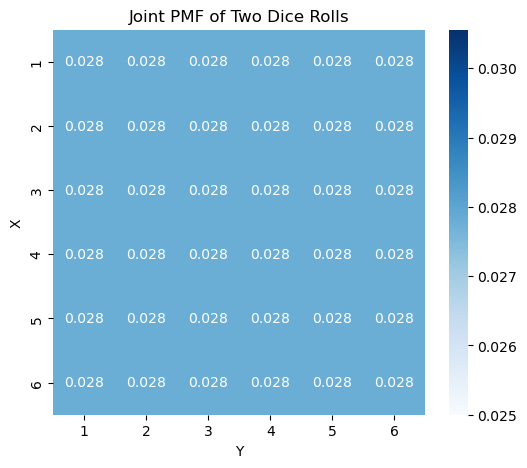

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of joint PMF
plt.figure(figsize=(6,5))
sns.heatmap(joint_pmf, annot=True, cmap='Blues', xticklabels=Y, yticklabels=X)
plt.title("Joint PMF of Two Dice Rolls")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()
